## Recommender systems group assignment
Everyone add their code to this notebook and make sure its well documented! If something already exists in the notebook, don't create it again. For example, you can already access to the data using the variables below:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

movies_df = pd.read_csv("Data/movies.csv")
ratings_df = pd.read_csv("Data/ratings.csv")
tags_df = pd.read_csv("Data/tags.csv")

### Helper methods
There are some helper methods already implemented, but feel free to add the ones you would like

In [30]:
def get_user_rated_movies(user_id):
    user_ratings = ratings_df[ratings_df['userId'] == user_id]

    user_liked_movies = pd.merge(user_ratings, movies_df, on='movieId')[['title', 'rating', 'movieId']]

    print(f"Movies liked by User {user_id}:")
    
    return user_liked_movies


def get_common_movies(user_id_1, user_id_2):
    """
    Returns the movies that two users rated in a similar way. (Th is the same or differs by one)
    """
    user_ratings_1 = ratings_df[ratings_df['userId'] == user_id_1]
    user_ratings_2 = ratings_df[ratings_df['userId'] == user_id_2]

    # Get common movies
    common_movies = pd.merge(user_ratings_1, user_ratings_2, on='movieId', suffixes=('_user1', '_user2'))

    # Filter common movies where the ratings are similar
    common_movies = common_movies[
        ((common_movies['rating_user1'] == common_movies['rating_user2']) |
         (common_movies['rating_user1'] - common_movies['rating_user2']).abs() == 1)
    ]
    common_movies_details = pd.merge(common_movies, movies_df, on='movieId')[['title', 'rating_user1', 'rating_user2', 'movieId']]

    print(f"Common movies rated similarly by User {user_id_1} and User {user_id_2}:")
    
    return common_movies_details

    

In [28]:
get_common_movies(1, 5)

Common movies rated similarly by User 1 and User 5:


,title,rating_user1,rating_user2,movieId
0,Toy Story (1995),4.0,4.0,1
1,"Usual Suspects, The (1995)",5.0,4.0,50
2,Braveheart (1995),4.0,4.0,110
3,Pulp Fiction (1994),3.0,5.0,296
4,Stargate (1994),3.0,2.0,316
5,Clear and Present Danger (1994),4.0,3.0,349
6,"Mask, The (1994)",4.0,4.0,367
7,"Fugitive, The (1993)",5.0,4.0,457
8,Schindler's List (1993),5.0,5.0,527
9,Dances with Wolves (1990),4.0,5.0,590


### Analyzing the dataset
We will start by plotting the number of evaluations (y axis) per movie(x axis)

<AxesSubplot:xlabel='index', ylabel='userId'>

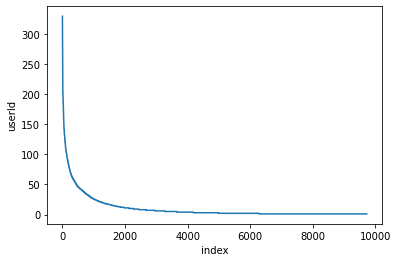

In [17]:
import seaborn as sns

count_ratings_df = ratings_df[['userId','movieId']].groupby(['movieId']).count()
count_ratings_df_ord = count_ratings_df.sort_values(by="userId", ascending=False).reset_index().reset_index()
sns.lineplot(data=count_ratings_df_ord, x='index', y='userId')

### Individual recommendations
Use the following format to write the methods!!

In [ ]:
# Rated movies by some user. (Movie with id 1 has a rating of 5 and so on...) 
user_ratings = {
    1: 5,
    3: 3,
    7: 5,
    15: 4,
    20: 2
}

#### Colaborative filtering
Recommends items based on user behavior and preferences, finding similarities between users or items

In [ ]:
#Use the previous format for the user ratings
def individual_colaborative_filtering(user_ratings):

#### Content based
Recommends items similar to those a user has shown interest in, based on item features.


In [ ]:
#Use the previous format for the user ratings
def individual_content_based(user_ratings):
    

### Group recommendations

In [ ]:
#Use the previous format for the user ratings. (In this case, a list of dictionaries)
def groupal_recommendations(list_user_ratings):

### Explanation of the recommendations made by the algorithms
Explain why your algorithm recommends those items to users. Note: easier to do with content based recsys

### Evaluation of the resulting explanations.
I dont know what they mean by this